# Final Project - Hospital Readmission

### Goal: 
- This machine learning system predicts whether a patient will be readmitted to the hospital within
30 days after discharge. The model is built as a binary classifier using structured patient records
from the Diabetes 130-US hospitals dataset. The goal is to assist hospitals in identifying high-
risk patients so they can intervene early and reduce costly, preventable readmissions

### Data Source: 
- Diabetes 130-US hospitals dataset from the UCI Machine Learning Repository


## A) Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount drive and load data

data_folder = 'data/'

In [3]:
data = pd.read_csv(data_folder + 'diabetic_data.csv')

In [4]:
id_map = pd.read_csv(data_folder + 'IDS_mapping.csv')

## B) Exploratory Data Analysis

In [5]:
# Data head

data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
# ID map head

print(id_map.head(20))

# Getting relevant definition from ID map
id_map['admission_type_id'] = pd.to_numeric(id_map['admission_type_id'], errors='coerce')
admission_map_df = id_map.dropna(subset=['admission_type_id'])
admission_map_df = admission_map_df[admission_map_df['admission_type_id'] <= 8]
admission_map = dict(zip(admission_map_df['admission_type_id'].astype(int), admission_map_df['description']))
data['admission_type_label'] = data['admission_type_id'].map(admission_map)


    admission_type_id                                        description
0                 1.0                                          Emergency
1                 2.0                                             Urgent
2                 3.0                                           Elective
3                 4.0                                            Newborn
4                 5.0                                      Not Available
5                 6.0                                                NaN
6                 7.0                                      Trauma Center
7                 8.0                                         Not Mapped
8                 NaN                                                NaN
9                 NaN                                        description
10                1.0                                 Discharged to home
11                2.0  Discharged/transferred to another short term h...
12                3.0                      Discharg

In [8]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
# Data description

data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
# Check for null data

data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [11]:
# Check for duplicated data

data.duplicated().sum()

0

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Physician Referral'),
  Text(1, 0, 'HMO Referral'),
  Text(2, 0, 'Clinic Referral'),
  Text(3, 0, ' Transfer from another health care facility'),
  Text(4, 0, ' Transfer from a Skilled Nursing Facility (SNF)'),
  Text(5, 0, ' Court/Law Enforcement'),
  Text(6, 0, ' Emergency Room'),
  Text(7, 0, 'Transfer from a hospital')])

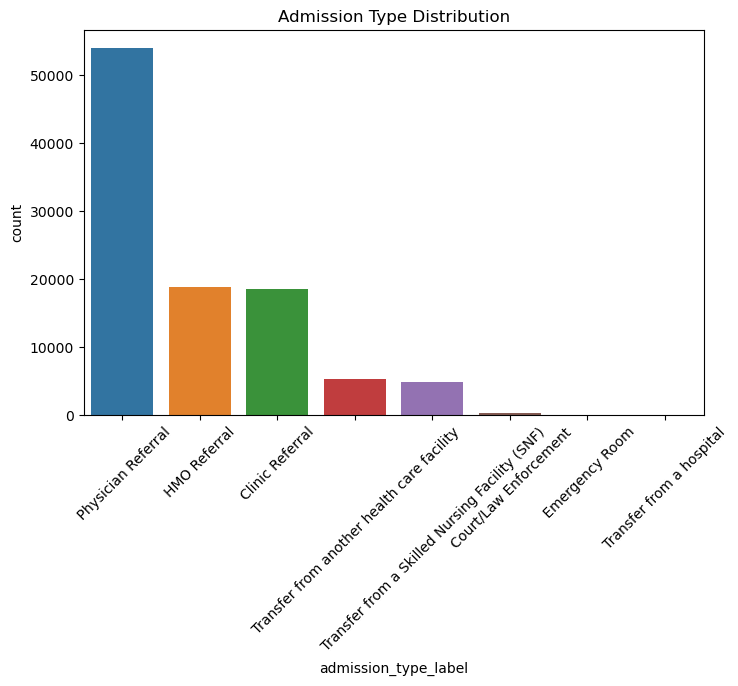

In [12]:
# Readmission classes

plt.figure(figsize=(8, 5))
sns.countplot(x='admission_type_label', data=data, order=data['admission_type_label'].value_counts().index)
plt.title("Admission Type Distribution")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Number of Inpatient Visits')

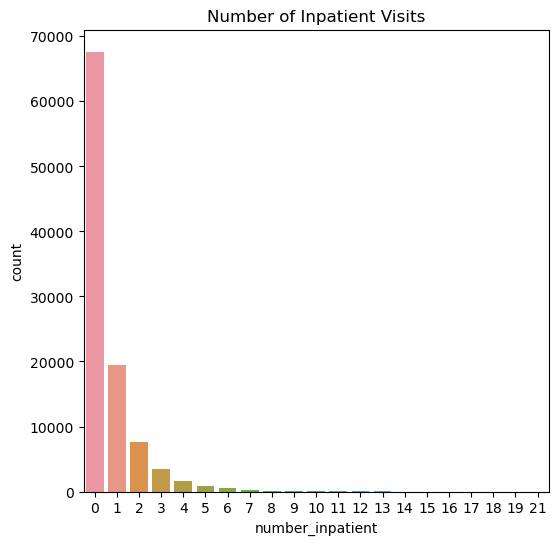

In [14]:
# Inpatient Visits

plt.figure(figsize=(6, 6))
sns.countplot(x='number_inpatient', data=data)
plt.title("Number of Inpatient Visits")


Text(0.5, 1.0, 'Age Distribution of Patients')

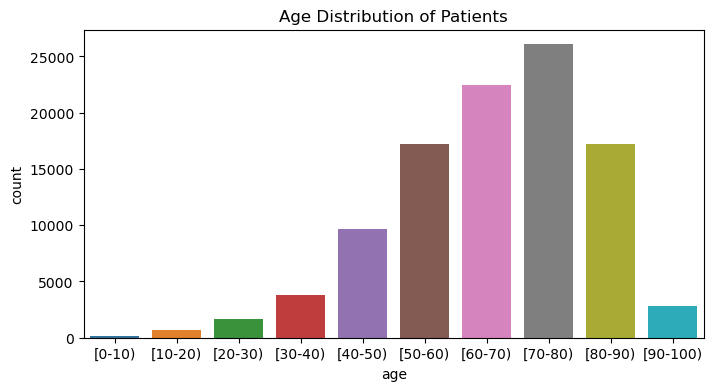

In [15]:
# Age distribution

plt.figure(figsize=(8, 4))
sns.countplot(x='age', data=data, order=sorted(data['age'].unique()))
plt.title("Age Distribution of Patients")


Text(0.5, 1.0, 'Top Admission Types')

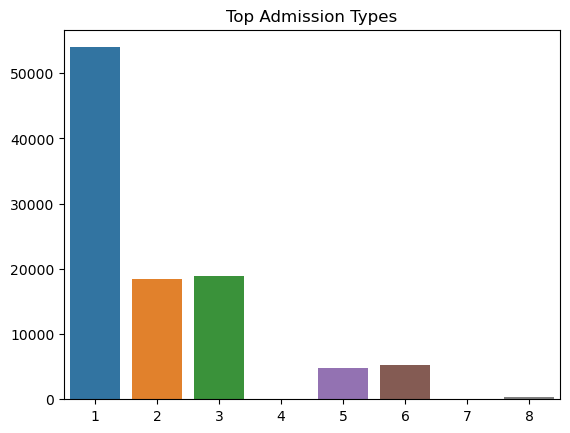

In [16]:
# Admission Types

top_admissions = data['admission_type_id'].value_counts().head(10)
sns.barplot(x=top_admissions.index, y=top_admissions.values)
plt.title("Top Admission Types")


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Caucasian'),
  Text(1, 0, 'AfricanAmerican'),
  Text(2, 0, '?'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Asian'),
  Text(5, 0, 'Hispanic')])

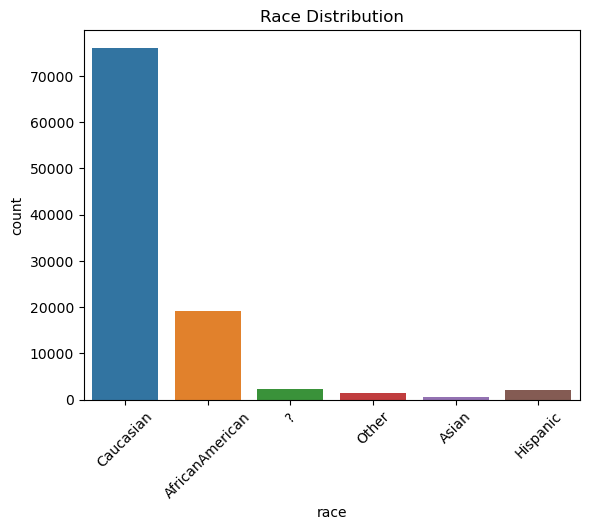

In [19]:
# Race and Ethnicity

sns.countplot(x='race', data=data)
plt.title("Race Distribution")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Top 10 Discharge Dispositions')

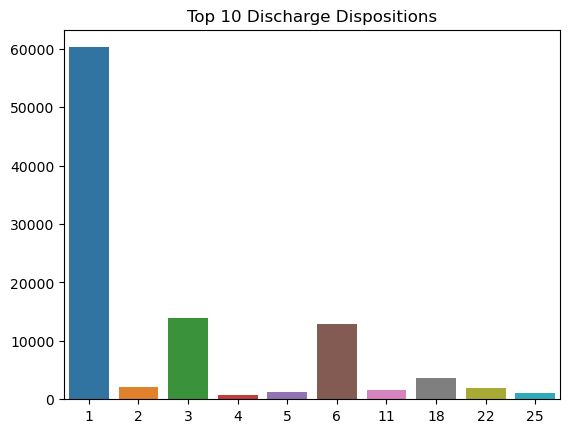

In [18]:
# Discharge disposition

# (See IDS_Mapping.csv for code)

top_dispositions = data['discharge_disposition_id'].value_counts().head(10)
sns.barplot(x=top_dispositions.index, y=top_dispositions.values)
plt.title("Top 10 Discharge Dispositions")


Text(0.5, 1.0, 'Histogram: Time in Hospital')

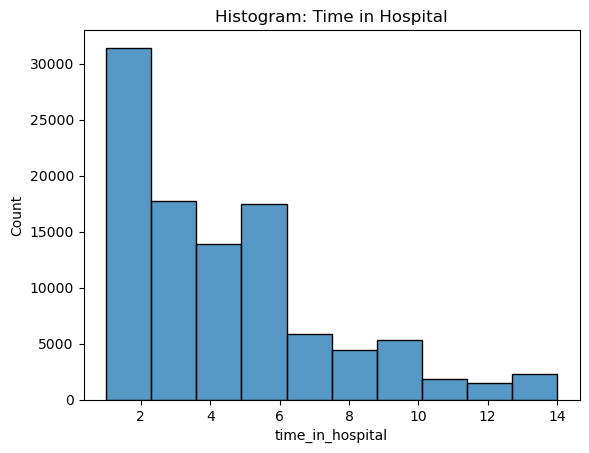

In [20]:
# Time in hospital

sns.histplot(data['time_in_hospital'], bins=10, kde=False)
plt.title("Histogram: Time in Hospital")


Text(0.5, 1.0, 'Number of Medications')

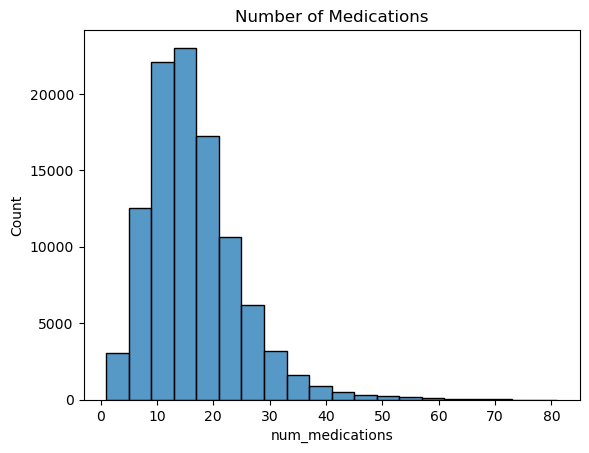

In [22]:
# Medication count

sns.histplot(data['num_medications'], bins=20)
plt.title("Number of Medications")


Text(0.5, 1.0, 'Correlation Heatmap')

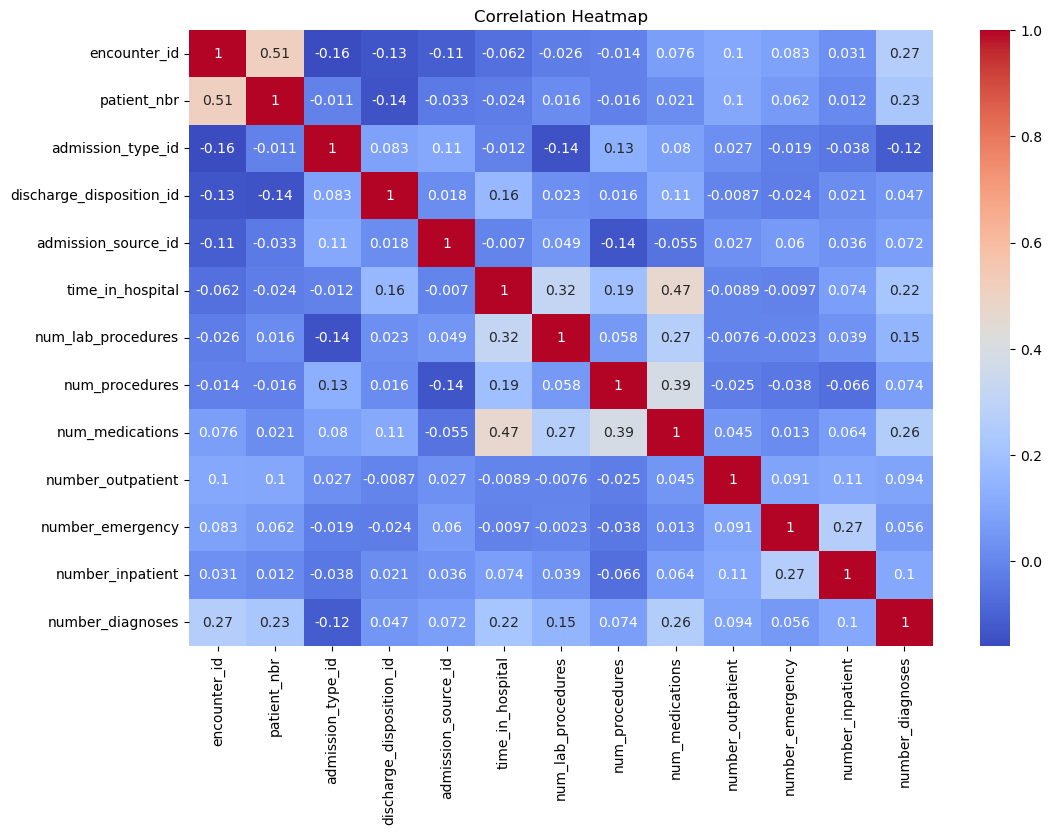

In [21]:
# Correlation heatmap

numeric_cols = data.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


## C) Feature Engineering

Text(0.5, 1.0, 'Readmission Distribution (Binary)')

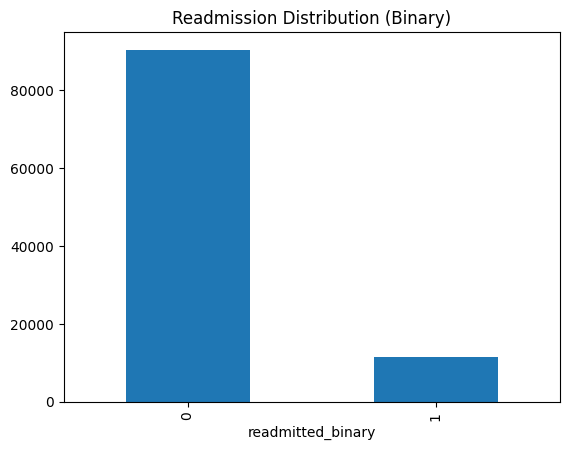

In [15]:
data['readmitted_binary'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
data['readmitted_binary'].value_counts(dropna=False).plot(kind='bar')
plt.title("Readmission Distribution (Binary)")